<a href="https://colab.research.google.com/github/aren-prime/plant-disease-detection/blob/main/plant_disease_prediction_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:12<00:00, 239MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [4]:
import os

# Replace 'path' with the actual path variable if it's not in that location
files = os.listdir(path)
print("Files downloaded:", files)

Files downloaded: ['test', 'New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)']


In [7]:
# List the unzipped files to verify the contents
files_after_extraction = os.listdir(path)
print("Files after extraction:", files_after_extraction)


Files after extraction: ['test', 'New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)']


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
import os

# Define the main path for the folder with subfolders
main_folder_path = os.path.join(path, 'New Plant Diseases Dataset(Augmented)')

# Function to recursively list all files in subdirectories
def list_files_recursive(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            print(os.path.join(root, file))

# List all files in 'New Plant Diseases Dataset(Augmented)'
list_files_recursive(main_folder_path)



Streaming output truncated to the last 5000 lines.
/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Potato___Late_blight/ad2396a9-306e-4ca9-88dc-56b2bde77c6b___RS_LB 2755_flipTB.JPG
/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Potato___Late_blight/ea2bb076-a483-4570-88ac-8ab236d4bb92___RS_LB 2503.JPG
/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Potato___Late_blight/053c5330-129d-4515-84da-82a701710723___RS_LB 4576_180deg.JPG
/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Potato___Late_blight/77f5fdf0-42c5-4af9-92d8-366e6a3a2017___RS

In [12]:
from tensorflow import keras

# Set up the paths for training and validation directories
#train_path = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'



In [13]:
import tensorflow as tf

# Update this path to point to your actual training dataset folder
train_path = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

training_set = tf.keras.utils.image_dataset_from_directory(
    directory=train_path,  # Use the full path to your training images
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


In [15]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    directory=valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [16]:
cnn = tf.keras.models.Sequential()

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [19]:
cnn.add(tf.keras.layers.Flatten())

In [20]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [21]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [22]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [23]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [25]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 877s 399ms/step - loss: 1.4401 - accuracy: 0.5776 - val_loss: 0.5621 - val_accuracy: 0.8245
Epoch 2/10
2197/2197 [==============================] - 882s 401ms/step - loss: 0.4713 - accuracy: 0.8499 - val_loss: 0.2586 - val_accuracy: 0.9163
Epoch 3/10
2197/2197 [==============================] - 878s 400ms/step - loss: 0.2802 - accuracy: 0.9099 - val_loss: 0.2044 - val_accuracy: 0.9335
Epoch 4/10
2197/2197 [==============================] - 877s 399ms/step - loss: 0.1924 - accuracy: 0.9370 - val_loss: 0.2034 - val_accuracy: 0.9362
Epoch 5/10
2197/2197 [==============================] - 882s 401ms/step - loss: 0.1465 - accuracy: 0.9523 - val_loss: 0.1331 - val_accuracy: 0.9573
Epoch 6/10
2197/2197 [==============================] - 875s 398ms/step - loss: 0.1153 - accuracy: 0.9619 - val_loss: 0.1736 - val_accuracy: 0.9462
Epoch 7/10
2197/2197 [==============================] - 879s 400ms/step - loss: 0.0925 - accuracy: 0.9696 - val_

In [26]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 140s 64ms/step - loss: 0.0493 - accuracy: 0.9842
Training accuracy: 0.984209418296814


In [27]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 35s 64ms/step - loss: 0.1590 - accuracy: 0.9553
Validation accuracy: 0.9552697539329529


In [28]:
cnn.save('trained_plant_disease_model.keras')

In [29]:
training_history.history

{'loss': [1.4401193857192993,
  0.47128167748451233,
  0.2802381217479706,
  0.19244541227817535,
  0.14653505384922028,
  0.11529681831598282,
  0.09252011030912399,
  0.07587547600269318,
  0.06803648173809052,
  0.057068511843681335],
 'accuracy': [0.5775943994522095,
  0.8499466776847839,
  0.9098798036575317,
  0.9369798898696899,
  0.952301025390625,
  0.9619318842887878,
  0.9695711135864258,
  0.9752187132835388,
  0.9778647422790527,
  0.9810512661933899],
 'val_loss': [0.5621476769447327,
  0.25861188769340515,
  0.20441092550754547,
  0.20336073637008667,
  0.13314107060432434,
  0.17362569272518158,
  0.11773879081010818,
  0.1648993194103241,
  0.11615576595067978,
  0.15898634493350983],
 'val_accuracy': [0.8244935274124146,
  0.9162873029708862,
  0.9334737062454224,
  0.9362053275108337,
  0.9573184847831726,
  0.9461643695831299,
  0.9635784029960632,
  0.9514568448066711,
  0.9662531018257141,
  0.9552697539329529]}

In [30]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [31]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


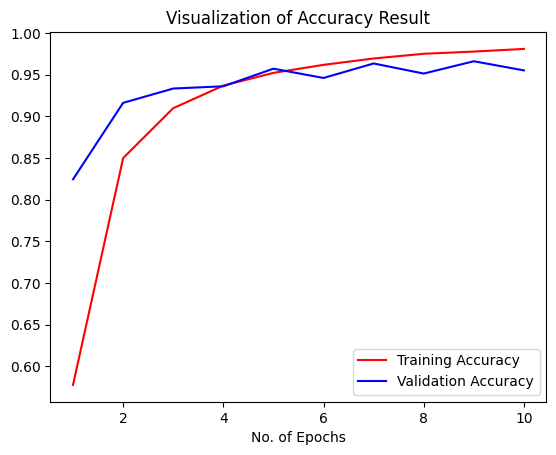

In [33]:
import matplotlib.pyplot as plt
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [34]:
class_name = validation_set.class_names

In [60]:
test_path = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/'

In [62]:
test_set = tf.keras.utils.image_dataset_from_directory(
     directory=valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [63]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 198s 11ms/step


In [64]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [65]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [66]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [67]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.94      0.95       504
                                 Apple___Black_rot       0.89      0.99      0.94       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.98      0.91      0.94       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.91      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.92      0.

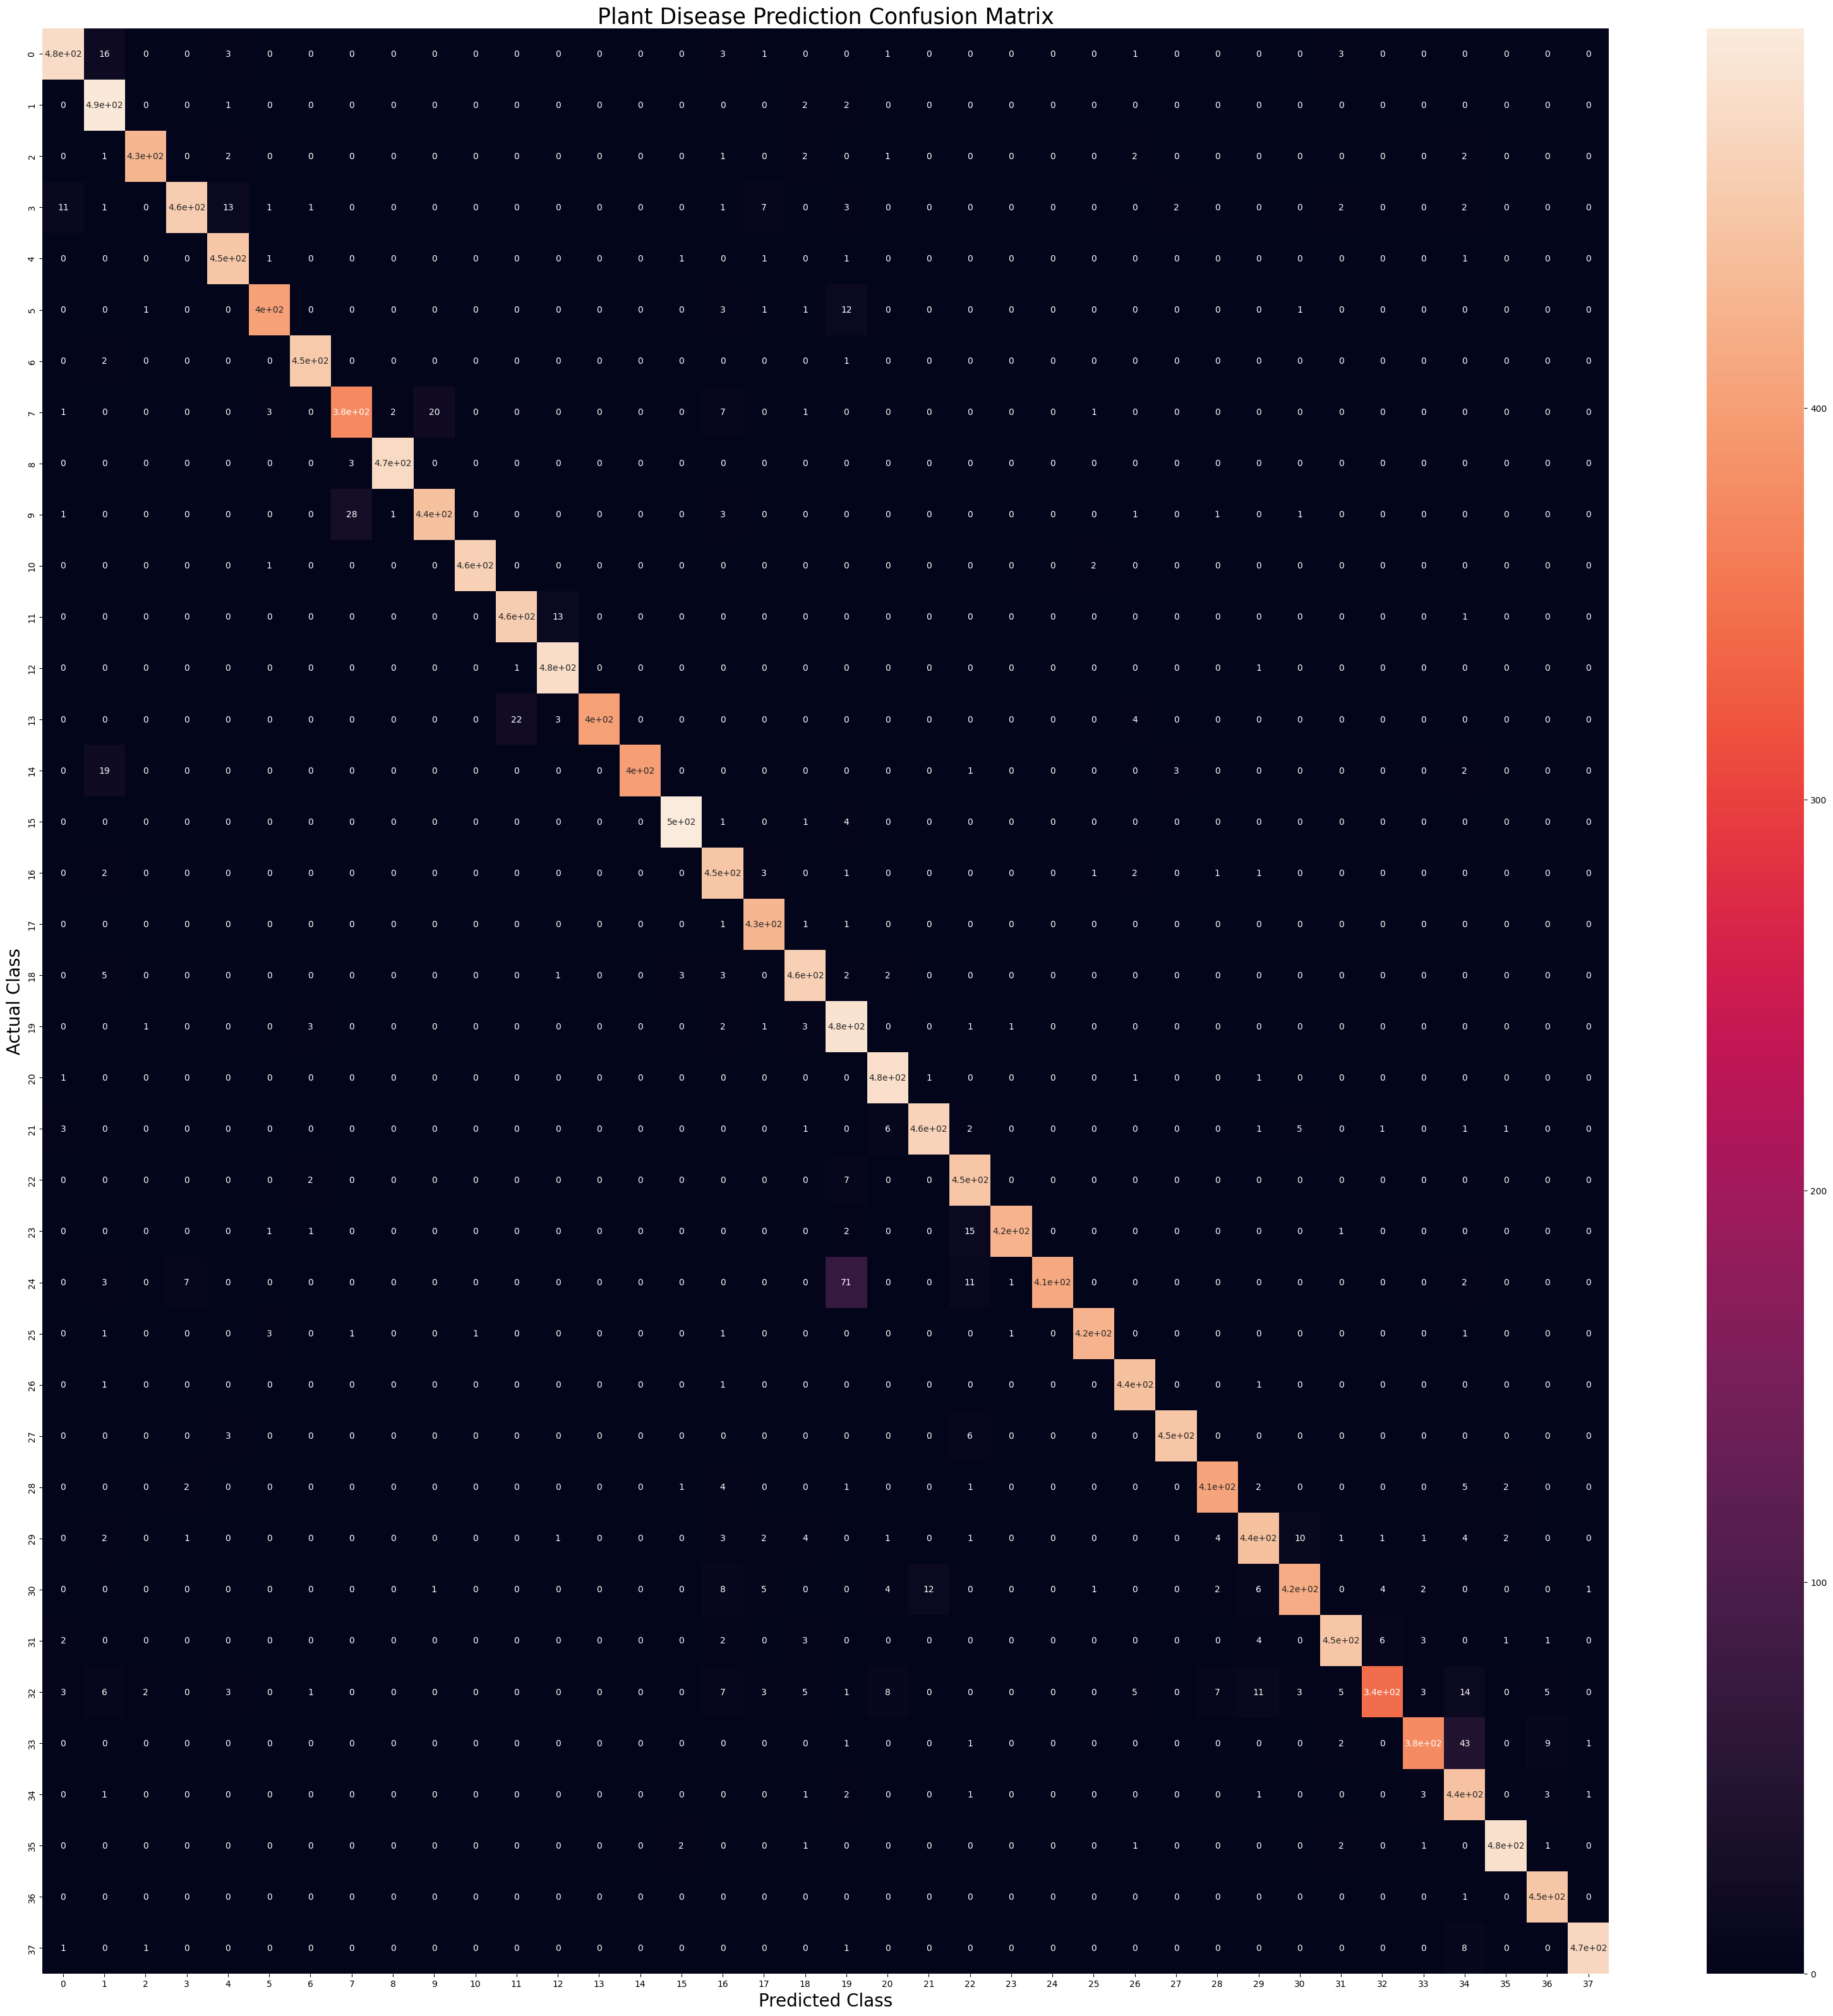

In [68]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [56]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

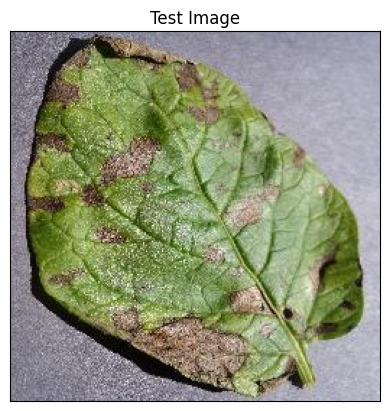

In [69]:
#Test Image Visualization
import cv2
image_path = '/content/PotatoEarlyBlight1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [70]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 140ms/step


In [73]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

20


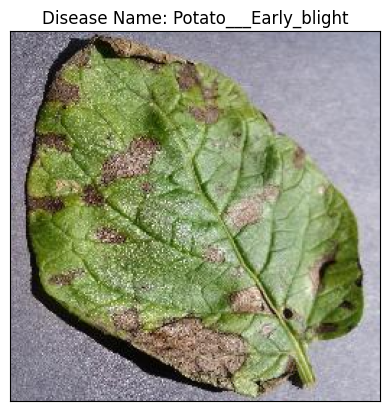

In [74]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()